A speedy and accurate diagnosis of COVID-19 is made possible by effective SARS-CoV-2 screening, which can also lessen the burden on healthcare systems. There have been built prediction models that assess the likelihood of infection by combining a number of parameters. These are meant to help medical professionals all over the world treat patients, especially in light of the scarcity of healthcare resources. The current dataset has been downloaded from ‘ABC’ government website and contains around 2,78,848 individuals who have gone through the RT-PCR test. Data set contains 11 columns, including 8 features suspected to play an important role in the prediction of COVID19 outcome. Outcome variable is covid result test positive or negative. We have data from 11th March 2020 till 30th April 2020. Please consider 11th March till 15th April as a training and validation set. From 16th April till 30th April as a test set. Please further divide training and validation set at a ratio of 4:1.  

section:1


1)Why is your proposal important in today’s world? How predicting a disease accurately can improve medical treatment?  

In Todaya's World ,Accurate predictions can enable early attention and reduce the burden on healthcare systems.
Predictive models help for management of public health crises

2)How is it going to impact the medical field when it comes to effective screening and reducing health care burden.

Early identification allows us for timely treatment and isolation, reduction in transmission of the disease.

Optimal resource allocation minimizes strain on healthcare resources.

Predictive models streamline screening processes for efficiency.

3)If any, what is the gap in the knowledge or how your proposed method can be helpful if required in the future for any other disease.

Identifying key features for COVID-19 prediction may provide insights for similar diseases.

Generalizable methods can be adapted for future disease outbreaks.

section 2: Intial Hyothesis

Intial hypothesis:
1a)Assumptions based on Data Analysis (DA) Track: Patterns in demographic data and pre-existing conditions may impact COVID-19 susceptibility. Certain features, like travel history and exposure, are likely to influence transmission.

1b)Assumptions based on Machine Learning (ML) Track: ML models will identify significant features impacting COVID-19 prediction. The chosen model will outperform others based on relevant cost functions.

section 3:
Data Analysis Apporach

1)Approach to Prove or Disprove Hypotheses: Conduct exploratory data analysis (EDA) to identify correlations and patterns. Validate assumptions through statistical analysis.

2)Relevant Feature Engineering Techniques: Creation of interaction features to capture combined effects. Normalization and scaling for model interpretability.

3)Justification of Data Analysis Approach: EDA provides insights into potential relationships before model development. Statistical analysis ensures robust hypothesis testing.

section 4 : Machine Learning Apporach

1)Method for Machine Learning Based Predictions of COVID-19: Implement a combination of supervised learning models (e.g., logistic regression, decision trees, random forests, and SVM). Utilize cross-validation to assess model performance.

2)Justification of the Most Appropriate Model: Model selection based on sensitivity, specificity, and area under the curve (AUC). Consideration of interpretability and computational efficiency.

3)Steps to Improve Accuracy: Hyperparameter tuning using grid search or random search. Feature selection based on model importance.

4)Comparison of Models: Evaluate performance metrics for each model.  precision-recall,accuracy ,f1 score

In [117]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [67]:
corona_tested= pd.read_csv('/content/corona_tested_006.csv',low_memory=False)
corona_tested.head(10)

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
0,1,11-03-2020,TRUE,FALSE,TRUE,FALSE,FALSE,negative,None,None,Abroad
1,2,11-03-2020,FALSE,TRUE,FALSE,FALSE,FALSE,positive,None,None,Abroad
2,3,11-03-2020,FALSE,TRUE,FALSE,FALSE,FALSE,positive,None,None,Abroad
3,4,11-03-2020,TRUE,FALSE,FALSE,FALSE,FALSE,negative,None,None,Abroad
4,5,11-03-2020,TRUE,FALSE,FALSE,FALSE,FALSE,negative,None,None,Contact with confirmed
5,6,11-03-2020,TRUE,FALSE,FALSE,FALSE,FALSE,other,None,None,Contact with confirmed
6,7,11-03-2020,FALSE,FALSE,FALSE,FALSE,FALSE,negative,None,None,Other
7,8,11-03-2020,FALSE,TRUE,FALSE,FALSE,FALSE,negative,None,None,Abroad
8,9,11-03-2020,TRUE,FALSE,FALSE,FALSE,FALSE,negative,None,None,Abroad
9,10,11-03-2020,TRUE,FALSE,TRUE,FALSE,FALSE,negative,None,None,Abroad


In [68]:
corona_tested.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278848 entries, 0 to 278847
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   Ind_ID               278848 non-null  int64 
 1   Test_date            278848 non-null  object
 2   Cough_symptoms       278848 non-null  object
 3   Fever                278848 non-null  object
 4   Sore_throat          278848 non-null  object
 5   Shortness_of_breath  278848 non-null  object
 6   Headache             278848 non-null  object
 7   Corona               278848 non-null  object
 8   Age_60_above         278848 non-null  object
 9   Sex                  278848 non-null  object
 10  Known_contact        278848 non-null  object
dtypes: int64(1), object(10)
memory usage: 23.4+ MB


from the above dataset checking the kind of data is present in it

In [69]:
print( corona_tested.Ind_ID.unique())
print(corona_tested.Test_date.unique())
print(corona_tested.Cough_symptoms.unique())
print(corona_tested.Fever.unique())
print(corona_tested.Sore_throat.unique())
print(corona_tested.Shortness_of_breath.unique())
print(corona_tested.Headache.unique())
print(corona_tested.Corona.unique())
print(corona_tested.Age_60_above.unique())
print(corona_tested.Sex.unique())
print(corona_tested.Known_contact.unique())


[     1      2      3 ... 278846 278847 278848]
['11-03-2020' '12-03-2020' '13-03-2020' '14-03-2020' '15-03-2020'
 '16-03-2020' '17-03-2020' '18-03-2020' '19-03-2020' '20-03-2020'
 '21-03-2020' '22-03-2020' '23-03-2020' '24-03-2020' '25-03-2020'
 '26-03-2020' '27-03-2020' '28-03-2020' '29-03-2020' '30-03-2020'
 '31-03-2020' '01-04-2020' '02-04-2020' '03-04-2020' '04-04-2020'
 '05-04-2020' '06-04-2020' '07-04-2020' '08-04-2020' '09-04-2020'
 '10-04-2020' '11-04-2020' '12-04-2020' '13-04-2020' '14-04-2020'
 '15-04-2020' '16-04-2020' '17-04-2020' '18-04-2020' '19-04-2020'
 '20-04-2020' '21-04-2020' '22-04-2020' '23-04-2020' '24-04-2020'
 '25-04-2020' '26-04-2020' '27-04-2020' '28-04-2020' '29-04-2020'
 '30-04-2020']
['TRUE' 'FALSE' 'None']
['FALSE' 'TRUE' 'None']
['TRUE' 'FALSE' 'None']
['FALSE' 'TRUE' 'None']
['FALSE' 'TRUE' 'None']
['negative' 'positive' 'other']
['None' 'No' 'Yes']
['None' 'male' 'female']
['Abroad' 'Contact with confirmed' 'Other']


here  none type of data  we need to make it as NA pandas can understand as like and 'other' type of data as NA nothing but we are replacing the value as NA

In [70]:
corona_tested.replace('None', pd.NA, inplace=True)

In [71]:
corona_tested['Corona'] = corona_tested['Corona'].replace('other', np.nan)

In [72]:
corona_tested['Known_contact'] = corona_tested['Known_contact'].replace('Other', np.nan)

In [73]:
print( corona_tested.Ind_ID.unique())
print(corona_tested.Test_date.unique())
print(corona_tested.Cough_symptoms.unique())
print(corona_tested.Fever.unique())
print(corona_tested.Sore_throat.unique())
print(corona_tested.Shortness_of_breath.unique())
print(corona_tested.Headache.unique())
print (corona_tested.Corona.unique())
print(corona_tested.Age_60_above.unique())
print(corona_tested.Sex.unique())
print(corona_tested.Known_contact.unique())


[     1      2      3 ... 278846 278847 278848]
['11-03-2020' '12-03-2020' '13-03-2020' '14-03-2020' '15-03-2020'
 '16-03-2020' '17-03-2020' '18-03-2020' '19-03-2020' '20-03-2020'
 '21-03-2020' '22-03-2020' '23-03-2020' '24-03-2020' '25-03-2020'
 '26-03-2020' '27-03-2020' '28-03-2020' '29-03-2020' '30-03-2020'
 '31-03-2020' '01-04-2020' '02-04-2020' '03-04-2020' '04-04-2020'
 '05-04-2020' '06-04-2020' '07-04-2020' '08-04-2020' '09-04-2020'
 '10-04-2020' '11-04-2020' '12-04-2020' '13-04-2020' '14-04-2020'
 '15-04-2020' '16-04-2020' '17-04-2020' '18-04-2020' '19-04-2020'
 '20-04-2020' '21-04-2020' '22-04-2020' '23-04-2020' '24-04-2020'
 '25-04-2020' '26-04-2020' '27-04-2020' '28-04-2020' '29-04-2020'
 '30-04-2020']
['TRUE' 'FALSE' <NA>]
['FALSE' 'TRUE' <NA>]
['TRUE' 'FALSE' <NA>]
['FALSE' 'TRUE' <NA>]
['FALSE' 'TRUE' <NA>]
['negative' 'positive' nan]
[<NA> 'No' 'Yes']
[<NA> 'male' 'female']
['Abroad' 'Contact with confirmed' nan]


All the values with None ,Other are changed to NA

filling the null values with mode

In [75]:
corona_tested['Cough_symptoms'].fillna(corona_tested['Cough_symptoms'].mode()[0], inplace=True)

In [76]:
corona_tested['Fever'].fillna(corona_tested['Fever'].mode()[0], inplace=True)

In [77]:
corona_tested['Sore_throat'].fillna(corona_tested['Sore_throat'].mode()[0], inplace=True)

In [78]:
corona_tested['Shortness_of_breath'].fillna(corona_tested['Shortness_of_breath'].mode()[0], inplace=True)

In [79]:
corona_tested['Headache'].fillna(corona_tested['Headache'].mode()[0], inplace=True)

In [80]:
corona_tested['Corona'].fillna(corona_tested['Corona'].mode()[0], inplace=True)

In [81]:
corona_tested['Age_60_above'].fillna(corona_tested['Age_60_above'].mode()[0], inplace=True)

In [82]:
corona_tested['Sex'].fillna(corona_tested['Sex'].mode()[0], inplace=True)

In [83]:
corona_tested['Known_contact'].fillna(corona_tested['Known_contact'].mode()[0], inplace=True)

checking that null vaues are placed with the mode values

In [84]:
print( corona_tested.Ind_ID.unique())
print(corona_tested.Test_date.unique())
print(corona_tested.Cough_symptoms.unique())
print(corona_tested.Fever.unique())
print(corona_tested.Sore_throat.unique())
print(corona_tested.Shortness_of_breath.unique())
print(corona_tested.Headache.unique())
print (corona_tested.Corona.unique())
print(corona_tested.Age_60_above.unique())
print(corona_tested.Sex.unique())
print(corona_tested.Known_contact.unique())


[     1      2      3 ... 278846 278847 278848]
['11-03-2020' '12-03-2020' '13-03-2020' '14-03-2020' '15-03-2020'
 '16-03-2020' '17-03-2020' '18-03-2020' '19-03-2020' '20-03-2020'
 '21-03-2020' '22-03-2020' '23-03-2020' '24-03-2020' '25-03-2020'
 '26-03-2020' '27-03-2020' '28-03-2020' '29-03-2020' '30-03-2020'
 '31-03-2020' '01-04-2020' '02-04-2020' '03-04-2020' '04-04-2020'
 '05-04-2020' '06-04-2020' '07-04-2020' '08-04-2020' '09-04-2020'
 '10-04-2020' '11-04-2020' '12-04-2020' '13-04-2020' '14-04-2020'
 '15-04-2020' '16-04-2020' '17-04-2020' '18-04-2020' '19-04-2020'
 '20-04-2020' '21-04-2020' '22-04-2020' '23-04-2020' '24-04-2020'
 '25-04-2020' '26-04-2020' '27-04-2020' '28-04-2020' '29-04-2020'
 '30-04-2020']
['TRUE' 'FALSE']
['FALSE' 'TRUE']
['TRUE' 'FALSE']
['FALSE' 'TRUE']
['FALSE' 'TRUE']
['negative' 'positive']
['No' 'Yes']
['female' 'male']
['Abroad' 'Contact with confirmed']


 Value count for Cough_symptoms
 FALSE    84.856266
TRUE     15.143734
Name: Cough_symptoms, dtype: float64
-----


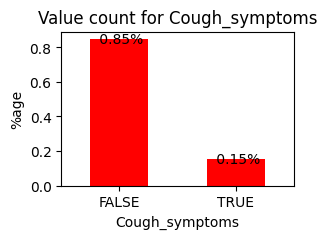

---------------------------------------------------------------------------------
 Value count for Fever
 FALSE    92.199334
TRUE      7.800666
Name: Fever, dtype: float64
-----


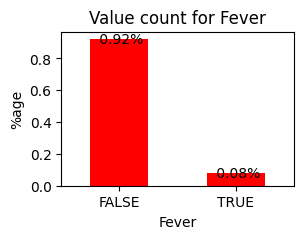

---------------------------------------------------------------------------------
 Value count for Sore_throat
 FALSE    99.309301
TRUE      0.690699
Name: Sore_throat, dtype: float64
-----


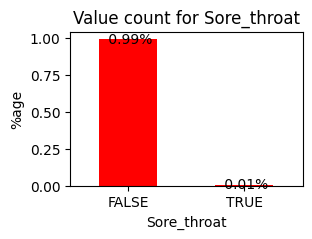

---------------------------------------------------------------------------------
 Value count for Shortness_of_breath
 FALSE    99.434459
TRUE      0.565541
Name: Shortness_of_breath, dtype: float64
-----


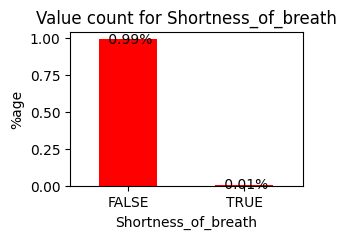

---------------------------------------------------------------------------------
 Value count for Headache
 FALSE    99.134295
TRUE      0.865705
Name: Headache, dtype: float64
-----


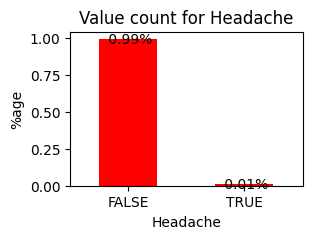

---------------------------------------------------------------------------------
 Value count for Corona
 negative    94.717911
positive     5.282089
Name: Corona, dtype: float64
-----


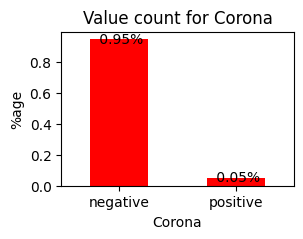

---------------------------------------------------------------------------------
 Value count for Age_60_above
 No     90.738682
Yes     9.261318
Name: Age_60_above, dtype: float64
-----


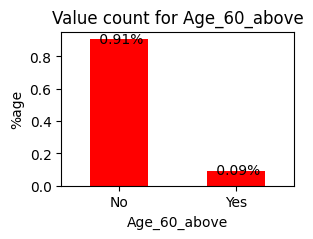

---------------------------------------------------------------------------------
 Value count for Sex
 female    53.692693
male      46.307307
Name: Sex, dtype: float64
-----


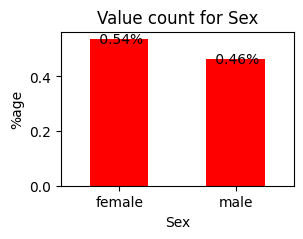

---------------------------------------------------------------------------------
 Value count for Known_contact
 Abroad                    96.18466
Contact with confirmed     3.81534
Name: Known_contact, dtype: float64
-----


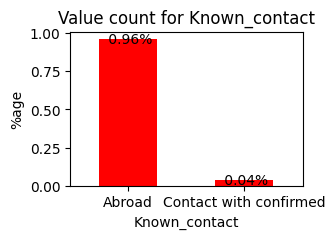

---------------------------------------------------------------------------------


In [95]:
for column in corona_tested.columns[2:]:
    value_count = corona_tested[column].value_counts(normalize= True)
    print(f" Value count for {column}\n",value_count*100)
    print("-----")

    #Create the Bar Graph for each visualiztion
    plt.figure(figsize=(3,2))
    red = (0.6, 0.9, 0)
    ax = value_count.plot(kind="bar", color='red')
    plt.xlabel(column)
    plt.ylabel("%age")
    plt.title(f"Value count for {column}")
    plt.xticks(rotation=0)
    #Add Data Label in the graph
    for index,value in enumerate(value_count):
        ax.text(index,value, f"{value: .2f}%", ha="center", va="center" )

    plt.show()
    print("---------------------------------------------------------------------------------")

In [92]:
data_copy = corona_tested.copy()

In [93]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

#Encode binary categorical variables
label_encoder = LabelEncoder()
binary_cols = ['Cough_symptoms', 'Fever', 'Sore_throat', 'Shortness_of_breath',
               'Headache', 'Corona','Age_60_above', 'Sex','Known_contact']
for col in binary_cols:
    data_copy[col] = label_encoder.fit_transform(data_copy[col])

data_copy

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
0,1,11-03-2020,1,0,1,0,0,0,0,0,0
1,2,11-03-2020,0,1,0,0,0,1,0,0,0
2,3,11-03-2020,0,1,0,0,0,1,0,0,0
3,4,11-03-2020,1,0,0,0,0,0,0,0,0
4,5,11-03-2020,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
278843,278844,30-04-2020,0,0,0,0,0,1,0,1,0
278844,278845,30-04-2020,0,0,0,0,0,0,0,0,0
278845,278846,30-04-2020,0,0,0,0,0,0,0,1,0
278846,278847,30-04-2020,0,0,0,0,0,0,0,1,0


In [97]:
data_copy = data_copy[data_copy["Corona"] != "other"]
data_copy["Corona"].value_counts()

0    264119
1     14729
Name: Corona, dtype: int64

o means corona negative
1 means corona positive the total counts of them are displayed

In [98]:
# Train-Validation-Test Split
train_val_data = data_copy[data_copy['Test_date'] < '2020-04-16']
test_data = data_copy[data_copy['Test_date'] >= '2020-04-16']

test_data.head()

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
12079,12080,21-03-2020,1,1,0,0,0,0,0,0,0
12080,12081,21-03-2020,0,0,0,0,0,0,0,0,0
12081,12082,21-03-2020,0,0,0,0,0,0,0,0,0
12082,12083,21-03-2020,0,0,0,0,0,0,0,0,0
12083,12084,21-03-2020,0,0,0,0,0,0,0,0,0


In [99]:
#Drop the Ind_ID	Test_date from train_val_data and test_data

train_val_data = train_val_data.drop(['Ind_ID', 'Test_date'],axis=1)


In [100]:
test_data = test_data.drop(["Ind_ID", "Test_date"], axis=1)
test_data

,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
12079,1,1,0,0,0,0,0,0,0
12080,0,0,0,0,0,0,0,0,0
12081,0,0,0,0,0,0,0,0,0
12082,0,0,0,0,0,0,0,0,0
12083,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
278843,0,0,0,0,0,1,0,1,0
278844,0,0,0,0,0,0,0,0,0
278845,0,0,0,0,0,0,0,1,0
278846,0,0,0,0,0,0,0,1,0


In [101]:
#Split the data into features(X) and target(y)

X= train_val_data.drop("Corona", axis=1)
y= train_val_data["Corona"]

X_test = test_data.drop("Corona", axis=1)
y_test = test_data["Corona"]

In [119]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X,y, test_size=0.25, random_state=35)

print(len(X_train), len(y_val))

113941 37981


In [120]:
models = {
    'Logistic Regression' : LogisticRegression(),
    'Decision Tree' : DecisionTreeClassifier() ,
    'Random Forest' : RandomForestClassifier(),
    'Gradient Boosting' : GradientBoostingClassifier(),
    'Support Vector Machine' : SVC()
}

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    accuracy = accuracy_score(y_val, y_pred)

    print(f"Accuracy of {model_name} is : {accuracy} \n")
    print(f"Classification Report is : \n{classification_report(y_val, y_pred)}")
    print("--------------------------------------------------------------------")


Accuracy of Logistic Regression is : 0.9592427792843791 

Classification Report is : 
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     35924
           1       0.70      0.44      0.54      2057

    accuracy                           0.96     37981
   macro avg       0.83      0.71      0.76     37981
weighted avg       0.95      0.96      0.95     37981

--------------------------------------------------------------------
Accuracy of Decision Tree is : 0.9619809904952477 

Classification Report is : 
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     35924
           1       0.73      0.47      0.57      2057

    accuracy                           0.96     37981
   macro avg       0.85      0.73      0.78     37981
weighted avg       0.96      0.96      0.96     37981

--------------------------------------------------------------------
Accuracy of Random Forest is : 0.962007319